In [1]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline

df = pd.read_csv('data/Survived.csv')
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C


In [2]:
df.value_counts('Survived')

Survived
0    549
1    342
Name: count, dtype: int64

In [3]:
df.isnull().sum()
# Cabinは欠損値が多いため除外する

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.shape

(891, 11)

In [5]:
# Ageも欠損値が多いが、年齢は予測に影響しそうなため、除外はしない
# 平均値で補完して、もしモデルの性能が上がらなかったら別の方法を検討する

# Ageは平均で穴埋め
df['Age'] = df['Age'].fillna(df['Age'].mean())
# Embarkedは、２件と少ないので最頻値で穴埋め
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [6]:
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
x = df[col]
t = df['Survived']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, t, test_size=0.2, random_state=0)
x_train.shape

(712, 5)

In [8]:
# class_weight='balanced'で不均等データの考慮をする
model = tree.DecisionTreeClassifier(max_depth=5, random_state=0, class_weight='balanced')
model.fit(x_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=0)

In [9]:
model.score(x_test, y_test)

0.7374301675977654

In [10]:
def learn(x, t, depth=3):
    x_train, x_test, y_train, y_test = train_test_split(x, t, test_size=0.2, random_state=0)

    model = tree.DecisionTreeClassifier(max_depth=depth, random_state=0, class_weight='balanced')
    model.fit(x_train, y_train)

    score = model.score(X=x_train, y=y_train)
    score2 = model.score(X=x_test, y=y_test)
    return round(score, 3), round(score2, 3), model

In [11]:
for j in range(1, 15):
    train_score, test_score, model = learn(x, t, depth=j)

    sentence = '訓練データの正解率{}'
    sentence2 = 'テストデータの正解率{}'
    total_sentence = '深さ{}:' + sentence + sentence2
    print(total_sentence.format(j, train_score, test_score))

# 複雑なモデルを作ると、訓練の結果は上がっていくが、逆にテストの結果は下がっていく。これを過学習という

深さ1:訓練データの正解率0.659テストデータの正解率0.704
深さ2:訓練データの正解率0.699テストデータの正解率0.732
深さ3:訓練データの正解率0.704テストデータの正解率0.737
深さ4:訓練データの正解率0.698テストデータの正解率0.726
深さ5:訓練データの正解率0.722テストデータの正解率0.737
深さ6:訓練データの正解率0.77テストデータの正解率0.698
深さ7:訓練データの正解率0.771テストデータの正解率0.648
深さ8:訓練データの正解率0.781テストデータの正解率0.631
深さ9:訓練データの正解率0.83テストデータの正解率0.704
深さ10:訓練データの正解率0.851テストデータの正解率0.687
深さ11:訓練データの正解率0.878テストデータの正解率0.676
深さ12:訓練データの正解率0.892テストデータの正解率0.654
深さ13:訓練データの正解率0.909テストデータの正解率0.654
深さ14:訓練データの正解率0.92テストデータの正解率0.654


In [12]:
df2 = pd.read_csv('data/Survived.csv')
print(df2['Age'].mean())
print(df2['Age'].median())


29.69911764705882
28.0


In [13]:
df2[['Survived', 'Age']].groupby('Survived').mean()

,Age
Survived,
0,30.626179
1,28.343690


In [14]:
df2[['Pclass', 'Age']].groupby('Pclass').mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [15]:
pd.pivot_table(df2, index='Survived', columns='Pclass', values='Age')

Pclass,1,2,3
Survived,,,
0,43.695312,33.544444,26.555556
1,35.368197,25.901566,20.646118


In [16]:
pd.pivot_table(df2, index='Survived', columns='Pclass', values='Age', aggfunc=max)

/var/folders/qg/p9z2yjzn6dl4fj3f9xr86w8w0000gn/T/ipykernel_16289/132571588.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'max' instead.
  pd.pivot_table(df2, index='Survived', columns='Pclass', values='Age', aggfunc=max)


Pclass,1,2,3
Survived,,,
0,71.0,70.0,74.0
1,80.0,62.0,63.0


In [17]:
is_null = df2['Age'].isnull()

# Pclass 1に関する埋め込み
df2.loc[(df2['Pclass'] == 1) & (df2['Survived'] == 0) & (is_null), 'Age'] = 43
df2.loc[(df2['Pclass'] == 1) & (df2['Survived'] == 1) & (is_null), 'Age'] = 35

# Pclass 2に関する埋め込み
df2.loc[(df2['Pclass'] == 2) & (df2['Survived'] == 0) & (is_null), 'Age'] = 33
df2.loc[(df2['Pclass'] == 2) & (df2['Survived'] == 1) & (is_null), 'Age'] = 25

# Pclass 3に関する埋め込み
df2.loc[(df2['Pclass'] == 3) & (df2['Survived'] == 0) & (is_null), 'Age'] = 26
df2.loc[(df2['Pclass'] == 3) & (df2['Survived'] == 1) & (is_null), 'Age'] = 20


In [18]:
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
x = df2[col]
t = df2['Survived']

for j in range(1, 15):
    s1, s2, m = learn(x, t, depth=j)
    sentence = '深さ{}:訓練データの精度{}::テストデータの精度{}'
    print(sentence.format(j, s1, s2))

深さ1:訓練データの精度0.659::テストデータの精度0.704
深さ2:訓練データの精度0.699::テストデータの精度0.67
深さ3:訓練データの精度0.722::テストデータの精度0.715
深さ4:訓練データの精度0.74::テストデータの精度0.704
深さ5:訓練データの精度0.76::テストデータの精度0.726
深さ6:訓練データの精度0.794::テストデータの精度0.793
深さ7:訓練データの精度0.819::テストデータの精度0.749
深さ8:訓練データの精度0.84::テストデータの精度0.749
深さ9:訓練データの精度0.885::テストデータの精度0.743
深さ10:訓練データの精度0.906::テストデータの精度0.732
深さ11:訓練データの精度0.93::テストデータの精度0.726
深さ12:訓練データの精度0.947::テストデータの精度0.737
深さ13:訓練データの精度0.961::テストデータの精度0.732
深さ14:訓練データの精度0.969::テストデータの精度0.721


In [19]:
sex = df2[['Survived', 'Sex']].groupby('Sex').mean()
sex

,Survived
Sex,
female,0.742038
male,0.188908


<Axes: xlabel='Sex'>

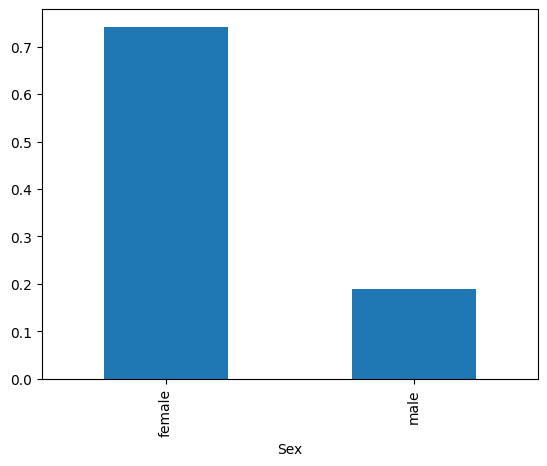

In [20]:
sex['Survived'].plot(kind='bar')

In [21]:

col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']
x = df2[col]
t = df2['Survived']

for j in range(1, 15):
    s1, s2, m = learn(x, t, depth=j)
    sentence = '深さ{}:訓練データの精度{}::テストデータの精度{}'
    print(sentence.format(j, s1, s2))


ValueError: could not convert string to float: 'female'

In [22]:
male = pd.get_dummies(df2['Sex'], drop_first=True)
male

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [23]:
pd.get_dummies(df2['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [24]:
pd.get_dummies(df2['Embarked'], drop_first=True)

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [25]:
x_temp = pd.concat([x, male], axis=1)
x_temp.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex,male
0,3,22.0,1,0,7.2500,male,True
1,1,38.0,1,0,71.2833,female,False
2,3,26.0,0,0,7.9250,female,False


In [26]:
tmp = pd.concat([x, x], axis=0)
tmp.shape

(1782, 6)

In [27]:
x_new = x_temp.drop('Sex', axis=1)
for j in range(1, 6):
    s1, s2, m = learn(x_new, t, depth=j)
    s = '深さ{}:訓練データの精度{}::テストデータの精度{}'
    print(s.format(j, s1, s2))

深さ1:訓練データの精度0.787::テストデータの精度0.788
深さ2:訓練データの精度0.792::テストデータの精度0.782
深さ3:訓練データの精度0.847::テストデータの精度0.81
深さ4:訓練データの精度0.854::テストデータの精度0.849
深さ5:訓練データの精度0.865::テストデータの精度0.86


In [28]:
s1, s2, model = learn(x_new, t, depth=5)

import pickle

with open('out/survived.pkl', 'wb') as f:
    pickle.dump(model, f)

In [29]:
model.feature_importances_

array([0.12084767, 0.25107251, 0.06754808, 0.00275855, 0.05145686,
       0.50631633])

In [30]:
pd.DataFrame(model.feature_importances_, index=x_new.columns)
# 特徴量重要度は値が大きいほど、その分類に与える影響が多い
# maleが一番大きいので、影響を与えているということになる

,0
Pclass,0.120848
Age,0.251073
SibSp,0.067548
Parch,0.002759
Fare,0.051457
male,0.506316
